In [1]:
import pandas as pd
import numpy as np
import ast

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

In [3]:
import os
storage = os.environ['MICOM_EXP'] + 'setA_mono_simTime144h/' # on Peregrine
storage

'/data/s4278836/First_project/experiments/setA_mono_simTime144h/'

In [4]:
batch_initr = pd.read_csv(storage + "init_r.batch_mono-culture.tsv", sep="\t")
batch_initr.head()

rep_name species_ID     mode    EU_avg      DACH  diabetes2  gluten_free  \
0     rep1    setA_11  plastic   5.66325   4.92715    5.66728      4.93010   
1     rep1    setA_11      sfm   5.66325   4.92715    5.66728      4.93010   
2     rep1    setA_13  plastic  10.06670  10.06730   10.06800     10.05900   
3     rep1    setA_13      sfm  10.06670  10.06730   10.06800     10.05900   
4     rep1    setA_14  plastic   4.17179   4.27208    4.28199      4.29963   

   high_fat  high_fiber  high_protein  mediterranean  unhealthy     vegan  \
0   4.26688     5.12537       5.15402        5.15910    4.27331   5.15162   
1   4.26688     5.12537       5.15402        5.15910    4.27331   5.15162   
2  10.03240    10.06840      10.06800       10.06830   10.03800  10.06740   
3  10.03240    10.06840      10.06800       10.06830   10.03800  10.06740   
4   3.89121     4.36073       4.31360        4.33169    4.29465   4.31281   

   vegetarian  
0     4.89419  
1     4.89419  
2    10.06700  
3    10.06700  
4     3.96706

In [5]:
# Check if initial growth rates are the same across replicates & plasticity modes
batch_initr.groupby(["species_ID"]).var().sum().sum() # should return 0

0.0

In [6]:
cont_initr = pd.read_csv(storage + "init_r.continuous_mono-culture.tsv", sep="\t")
# Check if initial growth rates are the same across replicates & plasticity modes
cont_initr.groupby(["species_ID"]).var().sum().sum() # should return 0

0.0

In [7]:
batch = batch_initr.groupby(["species_ID"]).mean()
cont = cont_initr.groupby(["species_ID"]).mean()

# Check if initial growth rates are the same across culture types
(batch != cont).sum().sum() # should return 0

0

In [8]:
species_metadat = pd.read_csv(os.environ['MICOM_EXP'] + 'selected_species_sets.tsv', sep="\t")
species_metadat['Species_ID'] = 'set' + species_metadat['Set'] + '_' + species_metadat['Count'].astype(str)

selected_species = pd.read_csv(storage + 'selected_species_setA.tsv', sep="\t")
selected_species_metadat = selected_species.merge(species_metadat.drop(['Set', 'Count'], axis=1), on=['Species_ID', 'Species_name'])

# Sort species by Phylum & Class
selected_species_metadat = selected_species_metadat.sort_values(by=['Phylum', 'Class'])
selected_species_metadat

Species_ID                             Species_name          Phylum  \
4      setA_9             Corynebacterium_ulcerans_809  Actinobacteria   
11    setA_18    Microbacterium_oleivorans_NBRC_103075  Actinobacteria   
5     setA_11               Eggerthella_lenta_DSM_2243  Actinobacteria   
0      setA_3           Alistipes_finegoldii_DSM_17242   Bacteroidetes   
1      setA_4            Bacteroides_caccae_ATCC_43185   Bacteroidetes   
12    setA_19             Odoribacter_laneus_YIT_12061   Bacteroidetes   
15    setA_22                 Prevotella_ruminicola_23   Bacteroidetes   
2      setA_6         Brevibacillus_brevis_NBRC_100599      Firmicutes   
9     setA_16              Lactobacillus_gastricus_PS3      Firmicutes   
3      setA_8              Clostridium_difficile_NAP07      Firmicutes   
7     setA_14  Faecalibacterium_cf_prausnitzii_KLE1255      Firmicutes   
16    setA_24         Ruminococcus_lactaris_ATCC_29176      Firmicutes   
13    setA_20           Peptoniphilus_timonensis_JC401      Firmicutes   
10    setA_17   Methyloversatilis_universalis_Fam50001  Proteobacteria   
8     setA_15                Helicobacter_pylori_26695  Proteobacteria   
6     setA_13  Escherichia_coli_str_K_12_substr_MG1655  Proteobacteria   
14    setA_21           Pseudomonas_nitroreducens_HBP1  Proteobacteria   
17    setA_26                    Vibrio_mimicus_MB_451  Proteobacteria   

             Class Gram_staining  Reactions_count  Metabolites_count  \
4   Actinobacteria             +             1154                921   
11  Actinobacteria             +             1354               1075   
5   Coriobacteriia             +              978                813   
0      Bacteroidia             -             1128                875   
1      Bacteroidia             -             1226                953   
12     Bacteroidia             -             1140                950   
15     Bacteroidia             -             1122                918   
2          Bacilli             ?             1593               1163   
9          Bacilli             +             1200                958   
3       Clostridia             +             1273                965   
7       Clostridia             +             1027                837   
16      Clostridia             +              958                843   
13    Tissierellia             ?             1030                841   
10            Beta             -             1320               1087   
8          Epsilon             -             1014                825   
6            Gamma             -             1786               1149   
14           Gamma             -             1623               1225   
17           Gamma             +             1532               1100   

                                      Metabolism_type  
4                         Saccharolytic, fermentative  
11                         Saccharolytic, respiratory  
5                                      Asaccharolytic  
0                         Saccharolytic, fermentative  
1                         Saccharolytic, fermentative  
12                       Asaccharolytic, fermentative  
15                        Saccharolytic, fermentative  
2                                       Saccharolytic  
9          Saccharolytic, fermentative or respiratory  
3            Proteolytic, few carbohydrates fermented  
7   Saccharolytic, fermentative, acetate converted...  
16                        Saccharolytic, fermentative  
13                                                  ?  
10                                       Fermentative  
8                Strictly respiratory, asaccharolytic  
6   Fermentative or respiratory, various carbohydr...  
14                                        Respiratory  
17                        Saccharolytic, fermentative

In [9]:
media_classified = pd.read_csv('./features/classify_media.data.tsv', sep='\t', index_col=0)
media_classified_color = pd.read_csv('./features/classify_media.color.tsv', sep='\t', index_col=0, 
                                   converters={1: ast.literal_eval, 2: ast.literal_eval})

In [10]:
# Choose data in continuous to plot (values are same in batch)
# Sort species by Phylum & Class
initr = cont.reindex(selected_species_metadat['Species_ID'], axis=0)

# Sort media by Shannon diversity
# initr = initr.reindex(media_classified.index, axis=1)

# Sort media by cluster resulted from hierarchical clustering on metabolite proportion
initr = initr.reindex(media_classified.sort_values(by='cluster').index, axis=1)
initr

mediterranean    EU_avg  gluten_free  high_protein     vegan  \
Species_ID                                                                 
setA_9            7.34914   7.80080      7.12665       7.34644   7.34483   
setA_18           4.84798   4.84758      4.84793       4.84769   4.84769   
setA_11           5.15910   5.66325      4.93010       5.15402   5.15162   
setA_3            5.89381   6.12624      5.78330       5.89371   5.89235   
setA_4            6.56360   6.56239      6.56320       6.56302   6.56255   
setA_19           6.32980   6.57962      6.20742       6.32957   6.32854   
setA_22           6.25949   6.24584      6.25571       6.25833   6.24659   
setA_6           12.22480  12.21770     12.21930      12.22020  12.22460   
setA_16           2.48043   6.52370      1.81200       2.47176   2.46962   
setA_8            6.32269   6.31373      6.24943       6.32444   6.28992   
setA_14           4.33169   4.17179      4.29963       4.31360   4.31281   
setA_24           3.14928   3.01644      3.09769       3.12088   3.10298   
setA_20           1.31609   1.32058      1.31373       1.31608   1.31599   
setA_17           5.08784   4.98831      5.03028       5.11046   5.08441   
setA_15           1.88821   1.88320      1.88554       1.88931   1.88826   
setA_13          10.06830  10.06670     10.05900      10.06800  10.06740   
setA_21           6.01964   5.97626      5.98603       6.03119   6.02163   
setA_26           5.65071   6.02995      5.06552       5.65866   5.53919   

            vegetarian  diabetes2  high_fiber      DACH   high_fat  unhealthy  
Species_ID                                                                     
setA_9         7.09680    7.80450     7.35005   7.12783   6.280250   6.496610  
setA_18        4.84761    4.84798     4.84807   4.84783   4.790850   4.809880  
setA_11        4.89419    5.66728     5.12537   4.92715   4.266880   4.273310  
setA_3         5.78135    6.12708     5.89254   5.78313   5.453220   5.454640  
setA_4         6.56146    6.56322     6.55460   6.56341   6.267950   6.478610  
setA_19        6.20573    6.58049     6.32846   6.20738   5.391370   5.414720  
setA_22        6.23500    6.25598     6.26138   6.25727   5.181180   6.226230  
setA_6        12.22010   12.22260    12.22660  12.22400  12.134300  12.147300  
setA_16        1.73595    6.66902     2.48883   1.80698   0.941977   0.987094  
setA_8         6.23800    6.31700     6.30436   6.28930   6.148920   6.255230  
setA_14        3.96706    4.28199     4.36073   4.27208   3.891210   4.294650  
setA_24        2.76144    3.06471     3.17577   3.07969   2.530440   3.043890  
setA_20        1.31325    1.32071     1.31610   1.31367   1.306270   1.306440  
setA_17        4.97832    5.11984     5.09900   5.07918   4.008140   4.774010  
setA_15        1.88266    1.88975     1.88914   1.88774   1.789150   1.805910  
setA_13       10.06700   10.06800    10.06840  10.06730  10.032400  10.038000  
setA_21        5.97217    6.03762     6.02764   6.01573   5.498040   5.750350  
setA_26        5.22011    6.01592     5.57850   5.37219   4.491760   4.946310

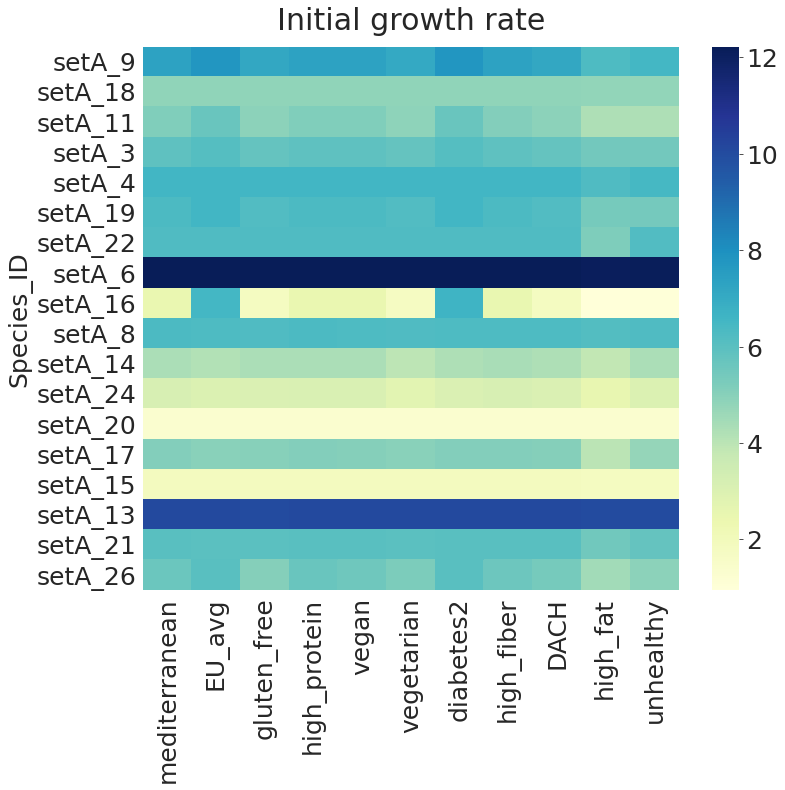

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

g = sns.heatmap(data=initr, cmap='YlGnBu', ax=ax)

ax.set_title("Initial growth rate", y=1.02)

plt.savefig("./fig/initr.svg", transparent=True, bbox_inches='tight')